Only works with Google Colab now! (Kaggle server and local machine compatibility will be provided later)

Add "mask_rcnn_coco.h5" pre-trained COCO weights into the model -> "/content/Mask-RCNN-TF2/mask_rcnn_coco.h5"
Download "mask_rcnn_coco.h5" file from: https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5.

Requirements (requirements.txt):
numpy
scipy
Pillow
cython
matplotlib
scikit-image==0.16.2
tensorflow==2.2.0
keras==2.3.1
opencv-python
h5py==2.10.0
imgaug
IPython[all]

Reference
https://github.com/ahmedfgad/Mask-RCNN-TF2
https://github.com/ahmedfgad/Mask-RCNN-TF2/blob/master/samples/mask-rcnn-prediction.py

In [1]:
import os
import sys
import json
import datetime
import numpy as np
import pandas as pd 
import skimage.draw
import cv2
# from mrcnn.visualize import display_instances
import matplotlib.pyplot as plt

In [2]:
# Directory to save logs and trained model
CONTENT_DIR = '/content'
# Source Folder name
MASK_RCNN = '/Mask-RCNN-TF2/'
# MASK RCNN DIR
ROOT_DIR = CONTENT_DIR + MASK_RCNN
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

In [3]:
MODEL_DIR

'/content/Mask-RCNN-TF2/logs'

In [4]:
# Preliminary Environment Setup
!git clone https://github.com/ahmedfgad/Mask-RCNN-TF2.git
os.chdir('Mask-RCNN-TF2')

fatal: destination path 'Mask-RCNN-TF2' already exists and is not an empty directory.


In [ ]:
!pip install -r requirements.txt

In [ ]:
!python setup.py install

In [7]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [8]:
# Import Mask RCNN
sys.path.append(os.path.join(CONTENT_DIR, MASK_RCNN))  # To find local version of the library
import mrcnn
import mrcnn.config
import mrcnn.model as modellib
from mrcnn import visualize

Using TensorFlow backend.


In [10]:
# load the class label names from disk, one label per line
# CLASS_NAMES = open("coco_labels.txt").read().strip().split("\n")

CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

class SimpleConfig(mrcnn.config.Config):
    # Give the configuration a recognizable name
    NAME = "coco_inference"
    
    # set the number of GPUs to use along with the number of images per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # COCO Dataset includes 80 different classes
	  # Number of classes = number of classes + 1 (+1 for the background). The background class is named BG
    NUM_CLASSES = len(CLASS_NAMES)

In [13]:
# Initialize the Mask R-CNN model for inference and then load the weights.
# This step builds the Keras model architecture.
model = mrcnn.model.MaskRCNN(mode="inference", config=SimpleConfig(), model_dir=os.getcwd())

In [22]:
# Load the weights into the model.
model.load_weights(filepath="/content/Mask-RCNN-TF2/mask_rcnn_coco.h5", by_name=True)

In [28]:
# load the input image, convert it from BGR to RGB channel
image = cv2.imread("/content/Mask-RCNN-TF2/images/6584515005_fce9cec486_z.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [29]:
# Perform a forward pass of the network to obtain the results
r = model.detect([image], verbose=0)

# Get the results for the first image.
r = r[0]

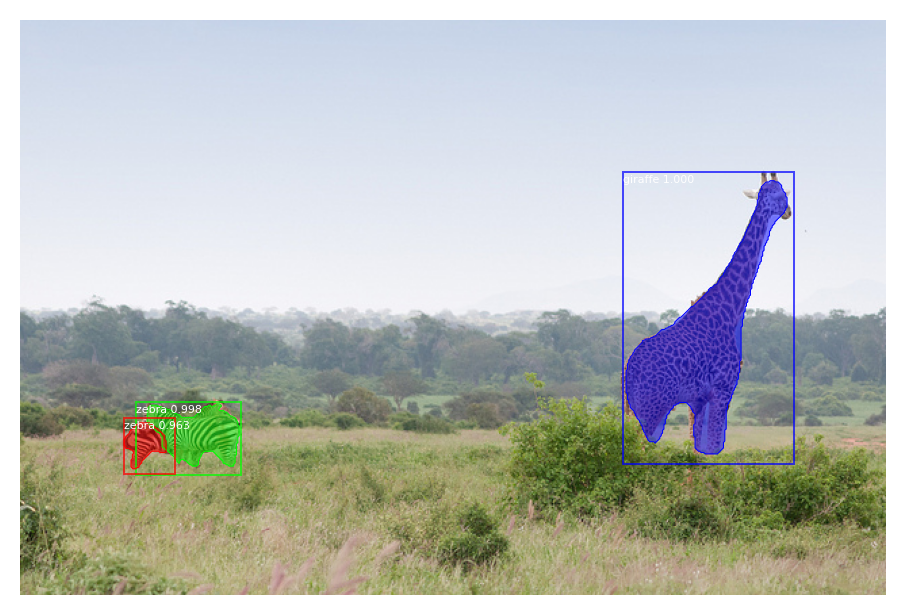

In [30]:
# Visualize the detected objects.
mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])

In [31]:
# https://github.com/ahmedfgad/Mask-RCNN-TF2
# https://github.com/ahmedfgad/Mask-RCNN-TF2/blob/master/samples/mask-rcnn-prediction.py